# Метод Галеркина  
\begin{cases}
X''+(\varkappa^2 \rho(x)-\gamma^2)X = 0,\quad x\in(a,b), \\
X(a)=X(b)=0.
\end{cases}
Будем искать $X$ в виде разложения по базису ортогональных функций: $X=\Psi^T C$, где
\begin{equation}
\Psi(x) =
\begin{pmatrix}
\Psi_1(x) \\
\Psi_2(x) \\
\vdots \\
\Psi_K(x)
\end{pmatrix}, \quad
C =
\begin{pmatrix}
C_1 \\
C_2 \\
\vdots \\
C_K
\end{pmatrix}.
\end{equation}
Тогда задача нахождения решения сведется к определению $\gamma$ и соответвствующего $C$.  
В качестве базисных функций выберем $\ \Psi_k(x)=\sqrt{\dfrac{2}{l}}\sin{\mu_k x},\ 
  \text{где}\ \mu_k=\dfrac{\pi k}{l},\ l=b-a,\ k=\overline{1,K}.$  
Подставим наше представление в уравнение и получим:
$$(\varkappa^2 \rho(x)-\gamma^2)\Psi^T C - \Psi^T M^2 C = 0,$$  
где
\begin{equation}
M =
\begin{pmatrix}
    \mu_1 & & 0 \\
    & \ddots & \\
    0 & & \mu_K
\end{pmatrix}
\end{equation}
Умножив слева на $\Psi$ и проинтегрировав на заданной области по $x$, получим СЛАУ:  
$$\left(\varkappa^2\int\limits_a^b\Psi\rho\Psi^Tdx-M^2\right) C = \gamma^2 C$$
Обозначим матрицу в левой части как $A$:  
$\quad A = \varkappa^2\int\limits_a^b\Psi\rho\Psi^Tdx-M^2$.  
Решая задачу на нахождение собственных значений и собственных векторов матрицы $A$: $A C=\lambda C$, найдем
$\gamma$ (как $\sqrt\lambda$) и $C$.


#### Будем решать задачу, позволяющую брать интегралы аналитически.
Тогда, используя символьные вычисления, значения интегралов в матричных элементах будем получать точно.

\begin{equation}
\rho(x) =
\begin{cases}
\rho_1, \quad x \le c_1, \\
\rho_1+\rho_2 4y (1-y),\ y=\dfrac{x-c_1}{c_2-c_1}, \quad c_1<x<c_2, \\
\rho_1, \quad c_2 \le x.
\end{cases}
\end{equation}

In [206]:
k = 3
a, b = 0, 8
c1, c2 = 2, 6

r1, r2 = 1, 2

rho(x) = x < c1 ? r1 : (c1 <= x <= c2 ? r1+r2*(y->4*y*(1-y))((x-c1)/(c2-c1)) : (c2 < x ? r1 : NaN))
K = 100

100

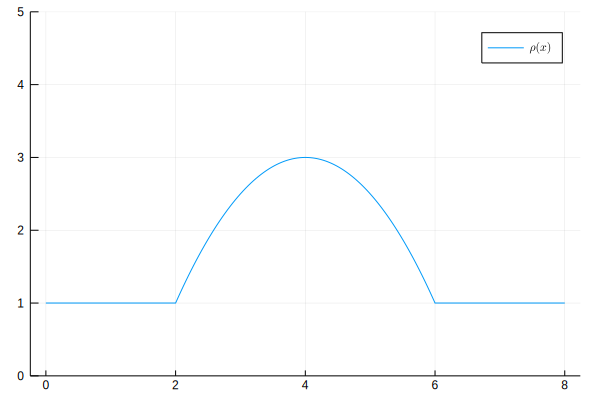

In [207]:
using Plots
using LaTeXStrings

grid = a:(b-a)/200:b
plot(grid,rho.(grid),ylim=(0,5),label=L"\rho(x)")

In [195]:
using SymPy

x = Sym("x")
l = symbols("l", positive=true)
mu(k) = pi*Sym(k)/l
f(x,k) = sqrt(2/(b-a))*sin(pi*k/(b-a)*x)

f (generic function with 1 method)

In [208]:
r(x) = r2*(y -> 4*y*(1-y))((x-c1)/(c2-c1))

k1,k2 = symbols("k_1 k_2", positive=true)
frf = simplify(integrate( sin(mu(k1)*x)*sin(mu(k2)*x)*r(x), x ))

⎧  ⎛ 2   5  2    ⎛π⋅k₂⋅x⎞    ⎛π⋅k₁⋅x⎞      2   5      ⎛π⋅k₂⋅x⎞    ⎛π⋅k₁⋅x⎞    
⎪l⋅⎜π ⋅k₁ ⋅x ⋅sin⎜──────⎟⋅cos⎜──────⎟ - 8⋅π ⋅k₁ ⋅x⋅sin⎜──────⎟⋅cos⎜──────⎟ + 1
⎪  ⎝             ⎝  l   ⎠    ⎝  l   ⎠                 ⎝  l   ⎠    ⎝  l   ⎠    
⎪─────────────────────────────────────────────────────────────────────────────
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎨                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                   

In [216]:
frf = frf(l=>b-a)
R(i,j) = 2/(b-a)*(frf(k1=>i,k2=>j,x=>c2)-frf(k1=>i,k2=>j,x=>c1))
B = zeros(K,K)
for i=1:K, j=i:K
    B[i,j] = N(R(i,j))
    i != j && (B[j,i] = B[i,j])
    i == j && (B[i,i] += r1)
end

In [217]:
using LinearAlgebra

num_mu(k) = pi*k/(b-a)
A = k^2*B - diagm(0=>num_mu.(1:K).^2)
L = eigvals(A);

In [218]:
J = filter(z->L[z]>0,1:K)

9-element Array{Int64,1}:
  92
  93
  94
  95
  96
  97
  98
  99
 100

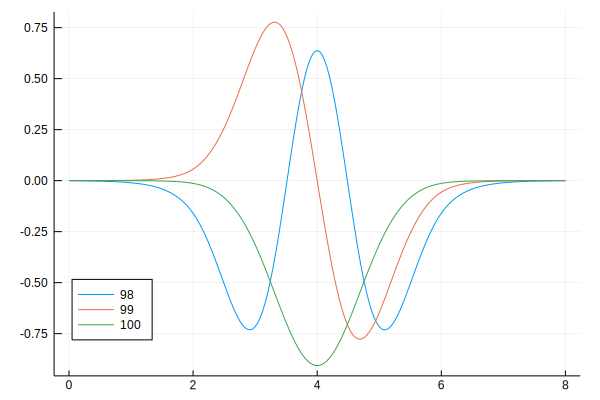

In [237]:
C = eigvecs(A)

X(x,n) = sum([f(x,i)*C[i,n] for i=1:K])

plot(legend=:bottomleft)
for i in J[end-2:end]
    plot!(grid, X.(grid,i), label="$i")
end
plot!()

Невязка:
$r_n(x)=\Psi_1 C_1(\varkappa^2\rho(x)-\gamma_n^2-\mu_1^2)+\dotso+\Psi_K C_K (\varkappa^2\rho(x)-
  \gamma_n^2-\mu_K^2)$

In [240]:
residual(x,n) = sum([f(x,i)*C[i,n]*(k^2*rho(x)-L[n]-num_mu(i)^2) for i=1:K])
plot()
for k in J[end-2:end]
    plot!(grid,residual.(grid,k),label="")
end
plot!()

LoadError: syntax: unexpected ")"